### 다양한 포맷으로 된 파일을 DataFrame으로 로딩하는 API 

1.  read_excel()


2.  read_csv()         
    - 기본 구분자 콤마(,)


3.  read_table() : 기본 구문자가 탭(\t)이다 ( 잘 안쓰임)
               read_csv('파일명','\t') 동일하다
                   
4.  read_fwf() : Fixed Width (고정길이) 기반의 컬럼 포맷을 읽어오는 함수




##### [참고]  utf-8 관련 에러 발생한다면?
    - read_csv('data/temp.csv', encoding=cp949)
    - cp949 : 윈도우에서의 한글

In [1]:
import pandas as pd

# csv 파일로 저장하기
mysource = {
    '시도':['서울','경기','인천','부산','대전'],
    '구분':['특별시','도','광역시','광역시','광역시'],
    '인구':['999만','1300만','400만','600만','300만'],
    '면적':[600.9, 10171, 1234.5, 747.8, 459.1]
}
df = pd.DataFrame(mysource)
df

# pd.to_csv('./result/temp.csv')
# pd.to_excel('./result/temp.xlsx')

,시도,구분,인구,면적
0,서울,특별시,999만,600.9
1,경기,도,1300만,10171.0
2,인천,광역시,400만,1234.5
3,부산,광역시,600만,747.8
4,대전,광역시,300만,459.1


In [17]:
# csv 파일을 읽어오는 방법
# temp.csv 팡리에서 읽어서 df1 변수가 가리키도록 하고 출력
df1 = pd.read_csv('./result/temp.csv') # 하나의 컬럼을 인덱스 컬럼 지정
df1

,Unnamed: 0,시도,구분,인구,면적
0,0,서울,특별시,999만,600.9
1,1,경기,도,1300만,10171.0
2,2,인천,광역시,400만,1234.5
3,3,부산,광역시,600만,747.8
4,4,대전,광역시,300만,459.1


In [18]:
# 하나의 컬럼을 인덱스 컬럼 지정
df1 = pd.read_csv('./result/temp.csv', index_col='Unnamed: 0')
df1

,시도,구분,인구,면적
0,서울,특별시,999만,600.9
1,경기,도,1300만,10171.0
2,인천,광역시,400만,1234.5
3,부산,광역시,600만,747.8
4,대전,광역시,300만,459.1


In [19]:
# 컬럼명 지정
df1 = pd.read_csv('./result/temp.csv', names=['No','시도','구분','인구','면적']) 
df1

,No,시도,구분,인구,면적
0,NaN,시도,구분,인구,면적
1,0.0,서울,특별시,999만,600.9
2,1.0,경기,도,1300만,10171.0
3,2.0,인천,광역시,400만,1234.5
4,3.0,부산,광역시,600만,747.8
5,4.0,대전,광역시,300만,459.1


In [25]:
# 불필요한 행 제외하고 로딩하기
df1 = pd.read_csv('./result/temp.csv', names=['No','시도','구분','인구','면적'],
                 index_col = 'No', skiprows=[0]) 
df1

,시도,구분,인구,면적
No,,,,
0,서울,특별시,999만,600.9
1,경기,도,1300만,10171.0
2,인천,광역시,400만,1234.5
3,부산,광역시,600만,747.8
4,대전,광역시,300만,459.1


In [29]:
# 출력행수 지정
df1 = pd.read_csv('./result/temp.csv', names=['No','시도','구분','인구','면적'],
                 index_col = 'No', skiprows=[0], nrows=3) 
df1

,시도,구분,인구,면적
No,,,,
0,서울,특별시,999만,600.9
1,경기,도,1300만,10171.0
2,인천,광역시,400만,1234.5


In [30]:
# 엑셀 파일 로딩하기
popular = pd.read_excel('./data/인구주택총조사2015.xlsx')
popular

,행정구역별,총인구,남자,여자,내국인계,내국인_남자,내국인_여자,외국인계,외국인_남자,외국인_여자,...,일반가구,집단가구,외국인가구,주택계,단독주택,아파트,연립주택,다세대주택,비거주용건물내주택,주택이외의거처
0,전국,51069375,25608502,25460873,49705663,24819839,24885824,1363712,788663,575049,...,19111030,16464,433109,16367006,3973961,9806062,485349,1898090,203544,607195
1,읍부,4616802,2360708,2256094,4467697,2262853,2204844,149105,97855,51250,...,1695508,2189,39718,1614808,544351,864404,66387,112764,26902,49554
2,면부,4774878,2455898,2318980,4546520,2291860,2254660,228358,164038,64320,...,1927621,4284,49128,1982064,1524970,334810,31485,61366,29433,78036
3,동부,41677695,20791896,20885799,40691446,20265126,20426320,986249,526770,459479,...,15487901,9991,344263,12770134,1904640,8606848,387477,1723960,147209,479605
4,서울특별시,9904312,4859535,5044777,9567196,4694317,4872879,337116,165218,171898,...,3784490,2261,128069,2793244,355039,1636896,117235,654372,29702,150951
5,부산광역시,3448737,1701347,1747390,3404667,1675339,1729328,44070,26008,18062,...,1335900,686,11729,1164352,225697,738068,32120,154253,14214,50810
6,대구광역시,2466052,1228511,1237541,2436770,1211219,1225551,29282,17292,11990,...,928528,574,8471,738100,155801,509068,9381,53098,10752,15304
7,인천광역시,2890451,1455017,1435434,2822601,1414793,1407808,67850,40224,27626,...,1045417,713,20167,942244,102914,577346,21589,232346,8049,39964
8,광주광역시,1502881,748867,754014,1481289,736656,744633,21592,12211,9381,...,567157,438,5586,486527,88401,376731,7396,8517,5482,10625
9,대전광역시,1538394,772243,766151,1519314,763310,756004,19080,8933,10147,...,582504,420,5471,468885,81292,338250,10068,34151,5124,10676


In [31]:
# 컬럼 지정 (컬럼의 종류가 너무 많은데 필요한 부분이 작은 경우에 사용한다)
popular = pd.read_excel('./data/인구주택총조사2015.xlsx', usecols='C:K',nrows=10)
popular

,남자,여자,내국인계,내국인_남자,내국인_여자,외국인계,외국인_남자,외국인_여자,가구계
0,25608502,25460873,49705663,24819839,24885824,1363712,788663,575049,19560603
1,2360708,2256094,4467697,2262853,2204844,149105,97855,51250,1737415
2,2455898,2318980,4546520,2291860,2254660,228358,164038,64320,1981033
3,20791896,20885799,40691446,20265126,20426320,986249,526770,459479,15842155
4,4859535,5044777,9567196,4694317,4872879,337116,165218,171898,3914820
5,1701347,1747390,3404667,1675339,1729328,44070,26008,18062,1348315
6,1228511,1237541,2436770,1211219,1225551,29282,17292,11990,937573
7,1455017,1435434,2822601,1414793,1407808,67850,40224,27626,1066297
8,748867,754014,1481289,736656,744633,21592,12211,9381,573181
9,772243,766151,1519314,763310,756004,19080,8933,10147,588395


### 텍스트파일 읽어오기

In [49]:
# 텍스트파일(data/TextData.txt) 읽어오기 (ex. read_csv 이용)
# 미리 엑셀파일에서 5줄 복사해서 메모장에 넣고 (탭구분상태)로 저장한다.
textData = pd.read_csv('./data/TextData.txt','wb')
textData

# 태양형
text = pd.read_csv('./data/TextData.txt', sep='\t', encoding='CP949')
text

<ipython-input-49-aeb6154d4553>:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  textData = pd.read_csv('./data/TextData.txt','wb')


,행정구역별,총인구,남자,여자,내국인계,내국인_남자
0,전국,51069375,25608502,25460873,49705663,24819839
1,읍부,4616802,2360708,2256094,4467697,2262853
2,면부,4774878,2455898,2318980,4546520,2291860
3,동부,41677695,20791896,20885799,40691446,20265126


### JSON 파일 읽어오기

In [63]:
# JSON 파일 읽어오기 (data/JsonData.json) 읽어오기
import json
# jsonData = pd.read_json('./data/JsonData.json',lines=True)
# jsonData
data = json.load(open('./data/JsonData.json'))
data

# 상연형꺼
# df = pd.json_normalize(data)
# df

# 태양형꺼
# with open('./data/JsonData.json', 'r', encoding='utf-8') as f:
#     data = json.load(f)
# pd.DataFrame(data=[data], columns=list(data.keys()))

# 혠이꺼
df1 = pd.read_json('data/JsonData.json',orient='index')
df1


,0
kind1,koreanfood
region,"[nosong, bibim, jungsung]"
food_name,"{'best-of-best': 'bibimbab', 'one-of-best': 'b..."


In [43]:
df = pd.read_csv('./data/inchun_subway.csv')
df

,역명,월,이용인원,승차인원,하차인원
0,계양,1,193593,95967,97626
1,귤현,1,56611,26409,30202
2,박촌,1,239187,124728,114459
3,임학,1,487274,248486,238788
4,계산,1,694152,349866,344286
...,...,...,...,...,...
343,테크노파크,12,180521,90714,89807
344,지식정보단지,12,228977,114444,114533
345,인천대입구,12,240576,120417,120159
346,센트럴파크,12,126305,62740,63565


In [44]:
df2 = df.loc[:,['역명','월','이용인원']]
df2

,역명,월,이용인원
0,계양,1,193593
1,귤현,1,56611
2,박촌,1,239187
3,임학,1,487274
4,계산,1,694152
...,...,...,...
343,테크노파크,12,180521
344,지식정보단지,12,228977
345,인천대입구,12,240576
346,센트럴파크,12,126305


In [45]:
df2[df2['역명']=='인천대입구']


,역명,월,이용인원
26,인천대입구,1,109605
55,인천대입구,2,110610
84,인천대입구,3,301332
113,인천대입구,4,307075
142,인천대입구,5,297375
171,인천대입구,6,228245
200,인천대입구,7,154568
229,인천대입구,8,123748
258,인천대입구,9,288417
287,인천대입구,10,320416


In [46]:
df2[(df2['역명']=='국제업무지구') | (df2['역명'] =='박촌') | (df2['역명'] == '테크노파크')].head(10)

,역명,월,이용인원
2,박촌,1,239187
24,테크노파크,1,136796
28,국제업무지구,1,19402
31,박촌,2,225404
53,테크노파크,2,135851
57,국제업무지구,2,19061
60,박촌,3,272128
82,테크노파크,3,158498
86,국제업무지구,3,28830
89,박촌,4,276003


In [56]:
df[['승차인원','하차인원']].mean()

승차인원    209927.060345
하차인원    207138.663793
dtype: float64

In [74]:
station_list = []
df3 =df2.drop_duplicates("역명", keep="first")
for station in df3.loc[:,'역명']:
    station_list.append(station)
print(station_list)


['계양', '귤현', '박촌', '임학', '계산', '경인교대입구', '작전', '갈산', '부평구청', '부평시장', '부평', '동수', '부평삼거리', '간석오거리', '인천시청', '예술회관', '인천터미널', '문학경기장', '선학', '신연수', '원인재', '동춘', '동막', '캠퍼스타운', '테크노파크', '지식정보단지', '인천대입구', '센트럴파크', '국제업무지구']


In [132]:
group_station = df2['이용인원'].groupby(df2['역명'])

result = pd.DataFrame(group_station.sum())
result = result.reset_index().rename(columns={"index": "역명"})
result

,역명,이용인원
0,간석오거리,9608477
1,갈산,6919100
2,경인교대입구,5545464
3,계산,9448304
4,계양,2787752
5,국제업무지구,408363
6,귤현,810665
7,동막,4468472
8,동수,3075778
9,동춘,7635479


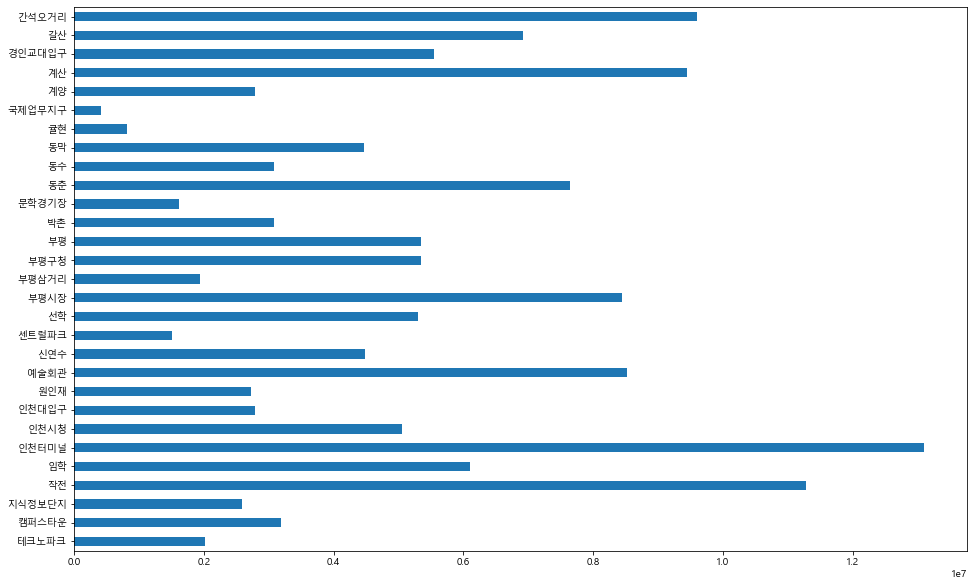

In [139]:
%matplotlib inline

# 한글처리
from matplotlib import rc
rc('font', family='Malgun Gothic')

import matplotlib.pyplot as plt
import numpy as np

result2 = result['이용인원']
plt.figure(figsize=(16,10))
result2.plot(kind='barh')
plt.gca().invert_yaxis()
plt.yticks(np.arange(29),result['역명']);
